  #                                  Titanic_Survival_Prediction

## Import necessary libraries

In [1]:
import numpy as np               # NumPy, a library for numerical computations
import pandas as pd              # Pandas, a library for data manipulation and analysis
import seaborn as sns            # Seaborn, a data visualization library based on Matplotlib
import matplotlib.pyplot as plt  # Matplotlib, a data visualization library
%matplotlib inline               # A magic command for displaying plots directly in Jupyter Notebook 
                                 # @(not needed in regular Python scripts)

In [2]:
# Read a CSV file into a Pandas DataFrame
titanic_df = pd.read_csv(r'C:\Users\Jaiku\Downloads\train.csv')

In [3]:
# Display the first few rows of the Titanic dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Get the dimensions (number of rows and columns) of the Titanic dataset
titanic_df.shape

(891, 12)

In [5]:
# Display information about the Titanic dataset including data types and missing values
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Count the missing (null) values in each column of the Titanic dataset
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Remove the 'Cabin' and 'PassengerId' columns from the Titanic dataset
titanic_df.drop(['Cabin','PassengerId'],axis = 1,inplace = True)

In [8]:
# Fill missing values in the 'Age' column with the mean age of passengers
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)

In [10]:
# Fill missing values in the 'Embarked' column with the most common (mode) value
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0],inplace = True)

In [11]:
# Check for and count the missing (null) values in each column of the Titanic dataset
titanic_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Verify that the dataset has no null values in any columns
,If 'missing_values' is empty, it means there are no null values

# EDA

In [12]:
## Finding the number of people survived or not survived

titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Zero(0) represent --> Not Survived  , 
One(1) represent --> Survived

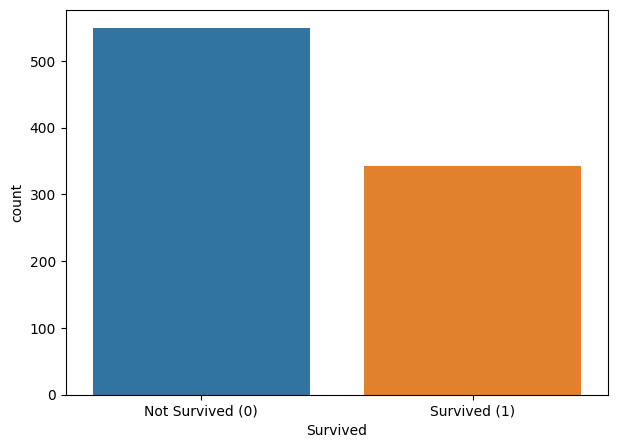

In [13]:
# Create a countplot to visualize the distribution of 'Survived' values
# Set the figure size for the plot
plt.figure(figsize=(7, 5))

# Create the countplot using Seaborn
ax = sns.countplot(x='Survived', data=titanic_df)

# Adding labels to the bars to improve readability
ax.set_xticklabels(['Not Survived (0)', 'Survived (1)'])

# Display the plot
plt.show()

Observing Survived columns we know that number of Survived is less than
number of Not Survived

In [14]:
## Finding number of Male and Female in 'Sex' Column

titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

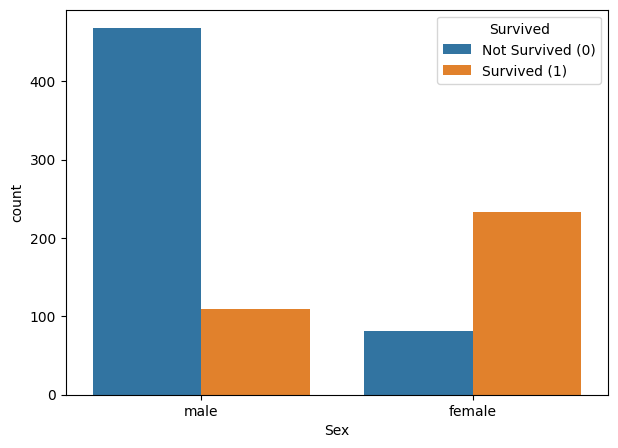

In [15]:
# Create a countplot to visualize the distribution of 'Sex' with respect to 'Survived'
# Set the figure size for the plot
plt.figure(figsize=(7, 5))

# Create the countplot using Seaborn, with 'Sex' on the x-axis and 'Survived' as hue
ax = sns.countplot(x='Sex', hue='Survived', data=titanic_df)

# Adding labels to the legend for clarity
legend_labels = ['Not Survived (0)', 'Survived (1)']
ax.legend(title='Survived', labels=legend_labels)

# Display the plot
plt.show()

By looking the graph , we can understand the number of survived Female is more
than Male

In [16]:
## Finding the number of people in 'Pclass'

titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

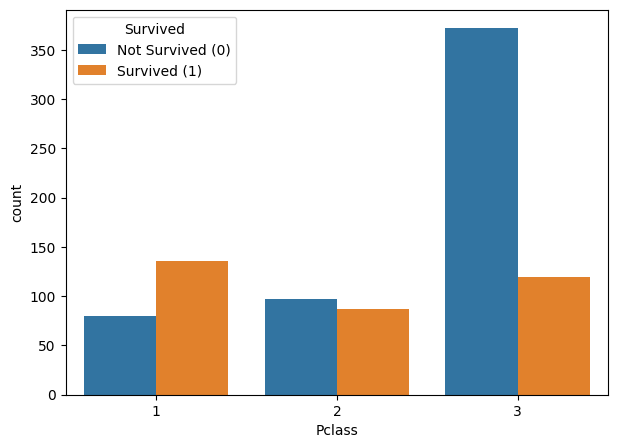

In [17]:
# Create a countplot to visualize the distribution of 'Pclass' with respect to 'Survived'
# Set the figure size for the plot
plt.figure(figsize=(7, 5))

# Create the countplot using Seaborn, with 'Pclass' on the x-axis and 'Survived' as hue
ax = sns.countplot(x='Pclass', hue='Survived', data=titanic_df)

# Adding labels to the hue legend and placing it on the left side
legend_labels = ['Not Survived (0)', 'Survived (1)']
ax.legend(title='Survived', labels=legend_labels, loc='upper left')

# Display the plot
plt.show()

By looking the graph we find the number of not survived is more than in Pclass
3 as compared the both class

Number of survived is more in pclass 1 as compare another two pclass

In [18]:
## Finding the number of people in 'Embarked'

titanic_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

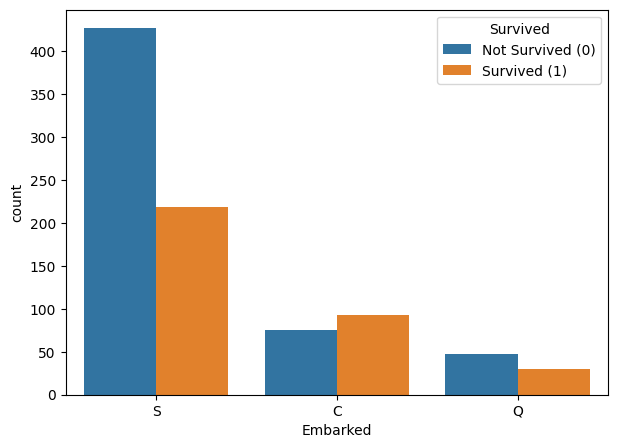

In [19]:
# Create a countplot to visualize the distribution of 'Embarked' with respect to 'Survived'
# Set the figure size for the plot
plt.figure(figsize=(7, 5))

# Create the countplot using Seaborn, with 'Embarked' on the x-axis and 'Survived' as hue
ax = sns.countplot(x='Embarked', hue='Survived', data=titanic_df)

# Adding labels to the hue legend
legend_labels = ['Not Survived (0)', 'Survived (1)']
ax.legend(title='Survived', labels=legend_labels)

# Display the plot
plt.show()

By looking the graph the find number of survived or not survived is more in 's'
Embarked as compare to another Embarked

In [20]:
# Replace values in the 'Sex' and 'Embarked' columns with numeric codes
# 'male' is replaced with 0, 'female' with 1, 'S' with 0, 'C' with 1, and 'Q' with 3

titanic_df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':3}},inplace = True)

In [21]:
# Remove the 'Name' and 'Ticket' columns from the Titanic dataset

titanic_df.drop(['Name','Ticket'],axis = 1,inplace = True)

In [22]:
# Display the first few rows of the cleaned and preprocessed Titanic dataset
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# Data cleaning and EDA steps have been completed
# The dataset is now ready to be split into 'x' (features) and 'y' (target) variables

In [23]:
# Extracting feature variables 'x' and target variable 'y' from the Titanic dataset

x = titanic_df.iloc[:,1:].values      # 'x' contains all columns except the first (target)
y = titanic_df.iloc[:,0].values       # 'y' contains the first column (target)

In [24]:
# Print the feature variables 'x' and the target variable 'y'
print(x,'\n\n')
print(y)

[[ 3.          0.         22.         ...  0.          7.25
   0.        ]
 [ 1.          1.         38.         ...  0.         71.2833
   1.        ]
 [ 3.          1.         26.         ...  0.          7.925
   0.        ]
 ...
 [ 3.          1.         29.69911765 ...  2.         23.45
   0.        ]
 [ 1.          0.         26.         ...  0.         30.
   1.        ]
 [ 3.          0.         32.         ...  0.          7.75
   3.        ]] 


[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 

In [25]:
# Splitting the data into training and testing sets
# 'x_train' and 'y_train' will contain the training data, while 'x_test' and 'y_test' will contain the testing data
# The data is divided into 80% training and 20% testing, and a random state is set for reproducibility

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=2)

In [26]:
# Print the shapes of the training and testing sets to check their dimensions
print(f"Train: {x_train.shape}, {y_train.shape}")
print(f"Test: {x_test.shape}, {y_test.shape}")

Train: (712, 7), (712,)
Test: (179, 7), (179,)


In [27]:
# Create a Logistic Regression model with specified hyperparameters

from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=1.0,penalty='l2',solver='lbfgs',max_iter=100,class_weight=None)

# Using K-Fold Cross-validation for model selction

In [28]:
# Define a scoring metric for K-fold cross-validation using accuracy_score
from sklearn.metrics import accuracy_score

def cv_scoring(estimator, x, y):
    return accuracy_score(y, estimator.predict(x))

# Initialize models
models = {
    'Logistic_Reg': LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=100),
}

from sklearn.model_selection import cross_val_score

# Produce cross-validation scores for the models
for model_name in models:
    model = models[model_name]
    
    # Perform K-fold cross-validation with K=10 folds
    scores = cross_val_score(model, x, y, cv=10, n_jobs=-1, scoring=cv_scoring)
    
    print("==" * 20)
    print(model_name)
    print(f'Scores : {scores}')
    print(f"Mean Score: {np.mean(scores)}")

Logistic_Reg
Scores : [0.78888889 0.79775281 0.74157303 0.83146067 0.80898876 0.76404494
 0.78651685 0.7752809  0.80898876 0.83146067]
Mean Score:0.7934956304619226


In [29]:
# Train a Logistic Regression model using the training data
Log_model = logit.fit(x_train, y_train)

# Print a success message to indicate that training is complete
print('Logistic Regression is Successfully Trained')

LogisticRegression is Sucessfully Trained


C:\Users\Jaiku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# Import scikit-learn metrics for model evaluation
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [33]:
# Predict labels on the training data using the Logistic Regression model
y_train_pred1 = logit.predict(x_train)

In [35]:
# Print the accuracy of Logistic Regression predictions on the training data
print('LogisticRegression Predicted Trained Accuracy')
print(f'Log_model train accuracy {accuracy_score(y_train_pred1,y_train)}')

LogisticRegression Predicted Trained Accuracy
Log_model train accuracy 0.8089887640449438


In [36]:
# Predict labels on the testing data using the Logistic Regression model
y_test_pred = logit.predict(x_test)

In [38]:
# Print the accuracy of Logistic Regression predictions on the testing data
print('LogisticRegression Predicted Test Accuracy')
print(f'Log_model test accuracy {accuracy_score(y_test_pred,y_test)}')

LogisticRegression Predicted Test Accuracy
Log_model test accuracy 0.7821229050279329


Training -set accuracy acore is 80% while the test-set accuracy to be a 78%
.These two values arr quite comparable. so, there is no question of overfitting

# Matrix For Model Evalution

In [39]:
# Compute and print the confusion matrix and its components
cm = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print('Confusion matrix\n\n', cm)

# Print the count of True Positives (TP)
print('\nTrue Positives (TP) = ', cm[0, 0])

# Print the count of True Negatives (TN)
print('\nTrue Negatives (TN) = ', cm[1, 1])

# Print the count of False Positives (FP)
print('\nFalse Positives (FP) = ', cm[0, 1])

# Print the count of False Negatives (FN)
print('\nFalse Negatives (FN) = ', cm[1, 0])

Confusion matrix

 [[91  9]
 [30 49]]

True Positives(TP) =  91

True Negatives(TN) =  49

False Positives(FP) =  9

False Negatives(FN) =  30


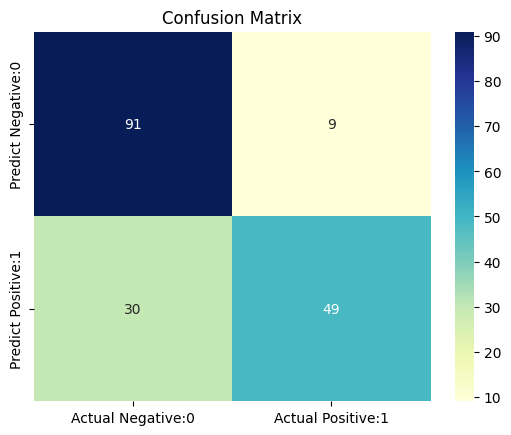

In [40]:
# Create a DataFrame to display the confusion matrix with labeled axes
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative:0', 'Actual Positive:1'], 
                         index=['Predict Negative:0', 'Predict Positive:1'])

# Create a heatmap using seaborn to visualize the confusion matrix
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Add a title to the heatmap
plt.title('Confusion Matrix')

# Display the heatmap
plt.show()

In [41]:
# Print the classification report for model evaluation
print(f'Classification Report\n\n\t {classification_report(y_test_pred,y_test)}')

Classification Report

	               precision    recall  f1-score   support

           0       0.91      0.75      0.82       121
           1       0.62      0.84      0.72        58

    accuracy                           0.78       179
   macro avg       0.77      0.80      0.77       179
weighted avg       0.82      0.78      0.79       179



In [42]:
# Calculate and print various classification metrics based on the confusion matrix

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

# Calculate and print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification Accuracy : {0:0.4f}'.format(classification_accuracy))
print('\n')

# Calculate and print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification Error : {0:0.4f}'.format(classification_error))
print('\n')

# Calculate and print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
print('\n')

# Calculate and print recall (sensitivity)
recall = TP / float(TP + FN)
print('Recall (Sensitivity) : {0:0.4f}'.format(recall))
print('\n')

# Calculate and print specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))


Classification accuracy : 0.7821


Classification error : 0.2179


Precision : 0.9100


Recall or Sensitivity : 0.7521


Specificity : 0.8448


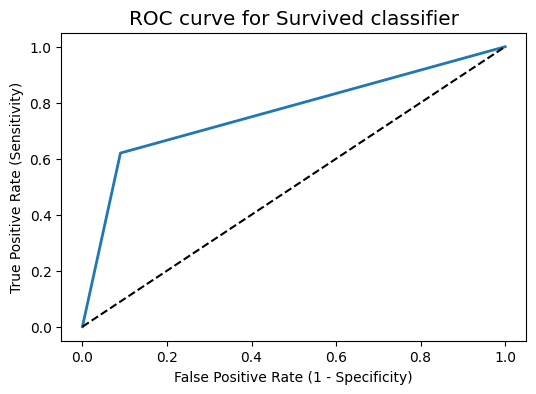

In [43]:
# Plot the ROC Curve for model evaluation

# Import the roc_curve function from scikit-learn
from sklearn.metrics import roc_curve

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

# Create a new figure for the ROC curve
plt.figure(figsize=(6, 4))

# Plot the ROC curve
plt.plot(fpr, tpr, linewidth=2)

# Plot the diagonal line for reference (random classifier)
plt.plot([0, 1], [0, 1], 'k--')

# Set the font size for labels
plt.rcParams['font.size'] = 12

# Set the title for the ROC curve plot
plt.title('ROC curve for Survived classifier')

# Label the x-axis
plt.xlabel('False Positive Rate (1 - Specificity)')

# Label the y-axis
plt.ylabel('True Positive Rate (Sensitivity)')

# Display the ROC curve plot
plt.show()

In [44]:
# Calculate and print the ROC AUC score for model evaluation

# Import the roc_auc_score function from scikit-learn
from sklearn.metrics import roc_auc_score

# Calculate the ROC AUC score by comparing predicted labels to actual labels
ROC_AUC = roc_auc_score(y_test, y_test_pred)

# Print the ROC AUC score with 4 decimal places
print('ROC AUC : {:.4f}'.format(ROC_AUC))


ROC AUC : 0.7651


The ROC AUC score provides a value between 0 and 1, where a higher score indicates better discrimination power of the model. 
In this case, the ROC AUC value is 0.7651, indicating that the model's ability to distinguish between classes is reasonably good.

# Training the Model on whole training datasets

In [50]:
# Initialize the final Logistic Regression model

final_logit_model = LogisticRegression(
    C=1.0,           # Inverse of regularization strength (default value)
    penalty='l2',    # Regularization penalty: L2 (ridge)
    solver='lbfgs',  # Algorithm to use for optimization
    max_iter=100,    # Maximum number of iterations for convergence
    class_weight=None # Weights for class balancing (None for equal weights)
)

In [51]:
# Fit the final Logistic Regression model to the data
final_logit_model.fit(x,y)

C:\Users\Jaiku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Testing Datasets

In [52]:
# Load test data from a CSV file into a Pandas DataFrame

test_data = pd.read_csv(r'C:\Users\Jaiku\Downloads\test.csv')

In [53]:
# Display the first few rows of the test dataset
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [69]:
# Get the dimensions (number of rows and columns) of the Titanic dataset
test_data.shape

(418, 8)

In [54]:
# Drop specified columns from the test dataset
test_data.drop(['PassengerId','Name','Cabin','Ticket'],axis = 1,inplace = True)

In [55]:
# Replace categorical values in the "Sex" and "Embarked" columns with numerical values in the test dataset
test_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':3}},inplace = True)

In [60]:
# Check and count missing values in the columns of the test dataset
test_data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [61]:
# Fill missing values in the "Age" and "Fare" columns with their respective mean values in the test dataset
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace=True)

In [63]:
# Check for and count the missing (null) values in each column of the Titanic dataset
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Verify that the dataset has no null values in any columns ,If 'missing_values' is empty, it means there are no null values

In [66]:
# Predict survival outcomes for the test dataset using the final Logistic Regression model
predicted_survival = final_logit_model.predict(test_data)

C:\Users\Jaiku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [67]:
# Add a new column "Pred_Survival" to the test dataset and populate it with predicted survival outcomes
test_data['Pred_Survival'] = predicted_survival

predicted_survival variable (the model's predictions) to the "Pred_Survival" column in the test dataset
Each row in this column will contain the model's prediction for whether the corresponding passenger in the test dataset is likely to survive or not (1 for survive, 0 for not survive). 
This allows you to easily compare the model's predictions with the actual outcomes for evaluation and analysis.

In [68]:
# Display the first few rows of the test dataset, including the predicted survival outcomes

test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pred_Survival
0,3,0,34.5,0,0,7.8292,3,0
1,3,1,47.0,1,0,7.0000,0,0
2,2,0,62.0,0,0,9.6875,3,0
3,3,0,27.0,0,0,8.6625,0,0
4,3,1,22.0,1,1,12.2875,0,1


In [70]:
# Save the final Logistic Regression model to a file using Pickle
import pickle

# 'final_logit_model': The trained Logistic Regression model to be saved
# 'model.pkl': The name of the file where the model will be saved
# 'wb': Open the file in binary write mode
pickle.dump(final_logit_model, open('model.pkl', 'wb'))

# Survival Prediction

In [73]:
# Define input data for prediction
input_data = (1, 1, 38, 1, 0, 71.2833, 1)

# Convert input_data to a NumPy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Use the trained model to make a survival prediction
prediction = final_logit_model.predict(input_data_reshaped)

# Print the prediction result
print(prediction)

# Interpret the prediction result
if prediction[0] == 0:
    print('The Person is not Survived')
else:
    print('The person is Survived')


[1]
The person is Survived
